Dual Thrust策略

策略逻辑

计算过去N个交易日的四个价格：最高价的最高价(HH)，收盘价的最低价(LC)，收盘价的最高价(HC)，最低价的最低价(LL);

计算range的大小，令range = max(HH-LC,HC-LL)

以当天的开盘价openD(0)为中枢，加上k1倍的range形成上轨，减去k2倍的range形成下轨

当日价格突破上轨的时候，平空开多，1手；

当日价格跌破下轨的时候，平多开空，1手；

交易费用按照万分之二计算。没有单独设置滑点。需要可以自己单独设置，在教程里面有。因为随着市场条件不同，滑点也不同，建议后续单独评估。

测试data_folder

使用后复权的玻璃期货1分钟的主力连续合约。

策略点评

前几年，这个策略在玻璃期货上表现很一般。但是2020年之后，该期货行情明显发生了变化，该策略表现比较好。

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


2013-01-04T09:12:00,  BUY : data_name:FG price : 1418.0 , cost : 4254.0 , commission : 26.0
2013-01-04T09:12:00, open symbol is : FG , price : 1418.0 
2013-01-04T14:56:00,  SELL : data_name:FG price : 1447.0 , cost : 4254.0 , commission : 26.0
2013-01-04T14:56:00, closed symbol is : FG , total_profit : 580.0 , net_profit : 528.0
2013-02-04T11:11:00,  BUY : data_name:FG price : 1554.0 , cost : 4662.0 , commission : 26.0
2013-02-04T11:11:00, open symbol is : FG , price : 1554.0 
2013-02-04T14:56:00,  SELL : data_name:FG price : 1566.0 , cost : 4662.0 , commission : 26.0
2013-02-04T14:56:00, closed symbol is : FG , total_profit : 240.0 , net_profit : 188.0
2013-02-21T09:33:00,  SELL : data_name:FG price : 1485.0 , cost : 4455.0 , commission : 26.0
2013-02-21T09:33:00, open symbol is : FG , price : 1485.0 
2013-02-21T14:56:00,  BUY : data_name:FG price : 1489.0 , cost : 4455.0 , commission : 26.0
2013-02-21T14:56:00, closed symbol is : FG , total_profit : -80.0 , net_profit : -132.0
2013-0

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pyfolio/utils.py:297: UserWarning: Detected intraday strategy; inferring positions from transactions. Set estimate_intraday=False to disable.
  warnings.warn('Detected intraday strategy; inferring positi' +
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/empyrical/stats.py:1527: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs(np.percentile(returns, 95)) / \
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, v

Start date,2012-12-03
End date,2021-07-30
Total months,100
,Backtest
Annual return,-1.1%
Cumulative returns,-8.6%
Annual volatility,2.6%
Sharpe ratio,-0.41
Calmar ratio,-0.09
Stability,0.58
Max drawdown,-11.6%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,11.63,2013-05-06,2020-08-19,NaT,NaN
1,0.00,2013-02-20,2013-02-20,2013-02-20,1
2,0.00,2013-02-20,2013-02-20,2013-02-20,1
3,0.00,2013-02-20,2013-02-20,2013-02-20,1
4,0.00,2013-02-20,2013-02-20,2013-02-20,1


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pyfolio/timeseries.py:1235: 

Stress Events,mean,min,max
Apr14,-0.01%,-0.22%,0.00%
Oct14,0.00%,0.00%,0.00%
Fall2015,0.01%,0.00%,0.18%
Recovery,0.00%,0.00%,0.00%
New Normal,-0.00%,-2.03%,1.99%


Top 10 long positions of all time,max
sid,
FG,21.99%


Top 10 short positions of all time,max
sid,
FG,-7.00%


Top 10 positions of all time,max
sid,
FG,21.99%


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pyfolio/plotting.py:1546: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(turnover, ax=ax, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pyfolio/plotting.py:1626: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  txn_time = txn_time.groupby(level=0).sum().reindex(index=range(570, 961))


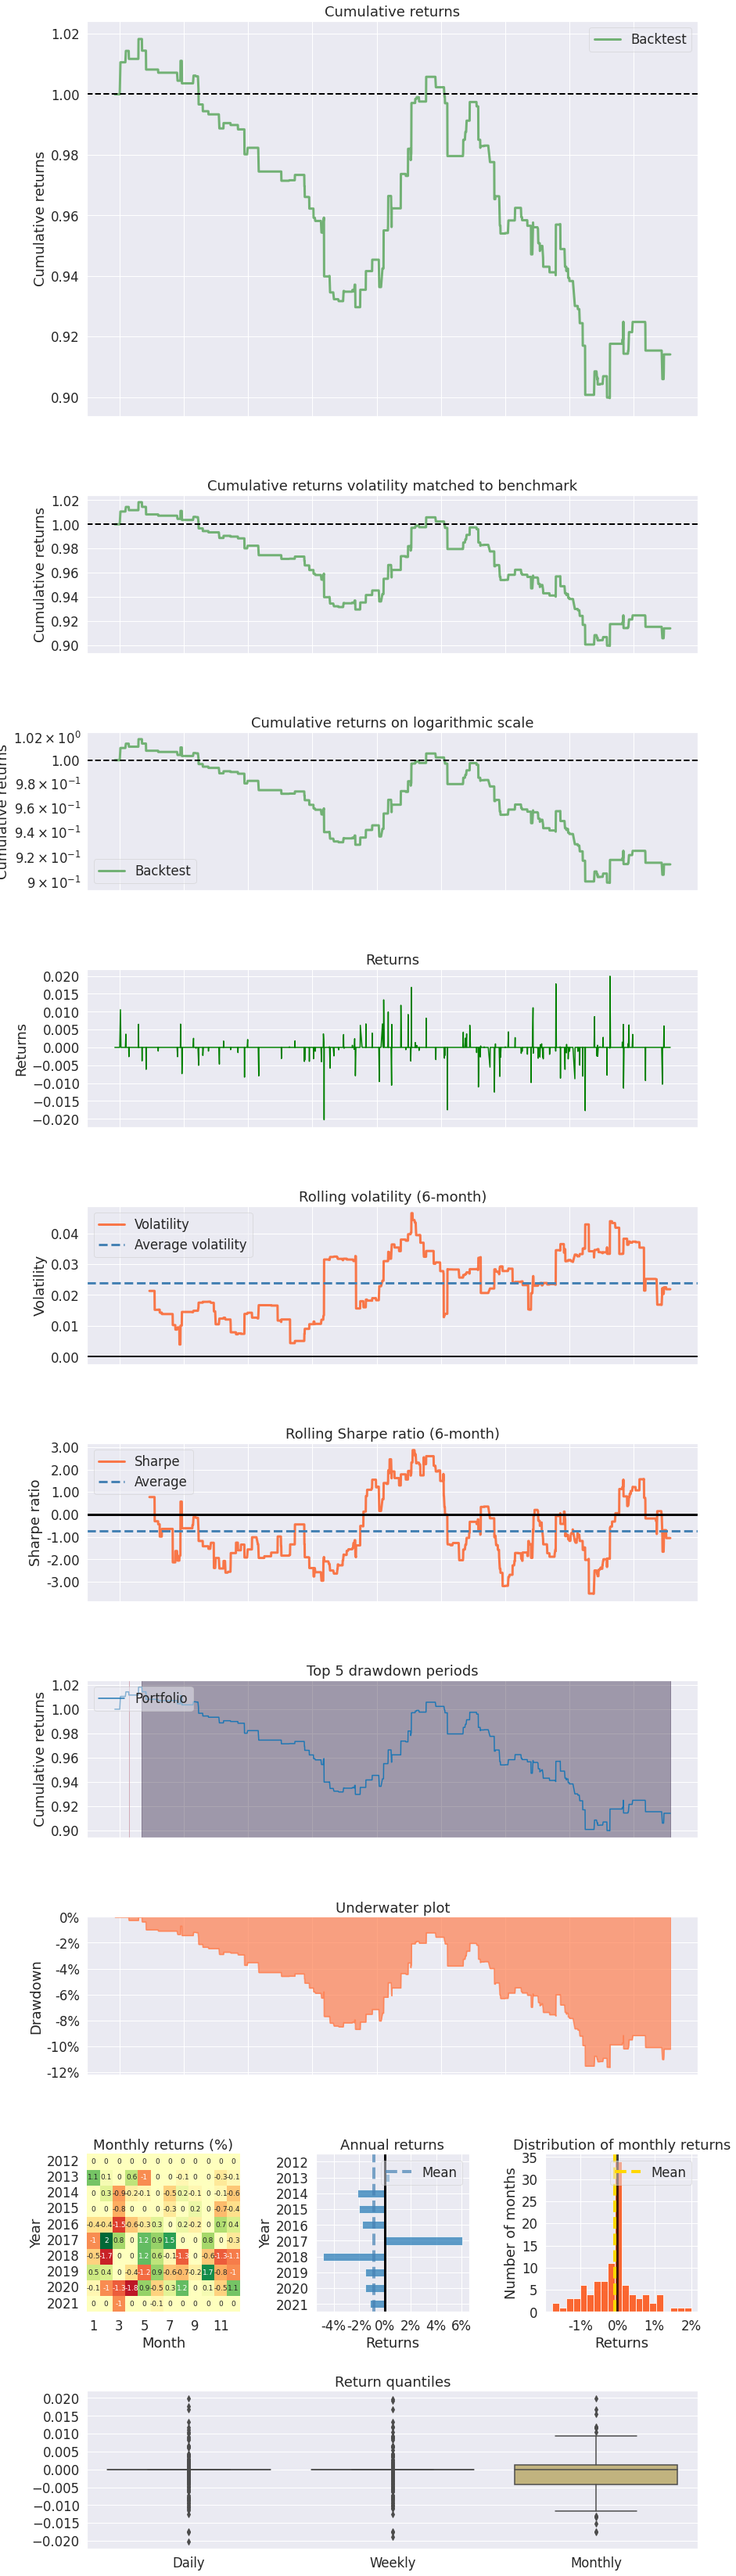

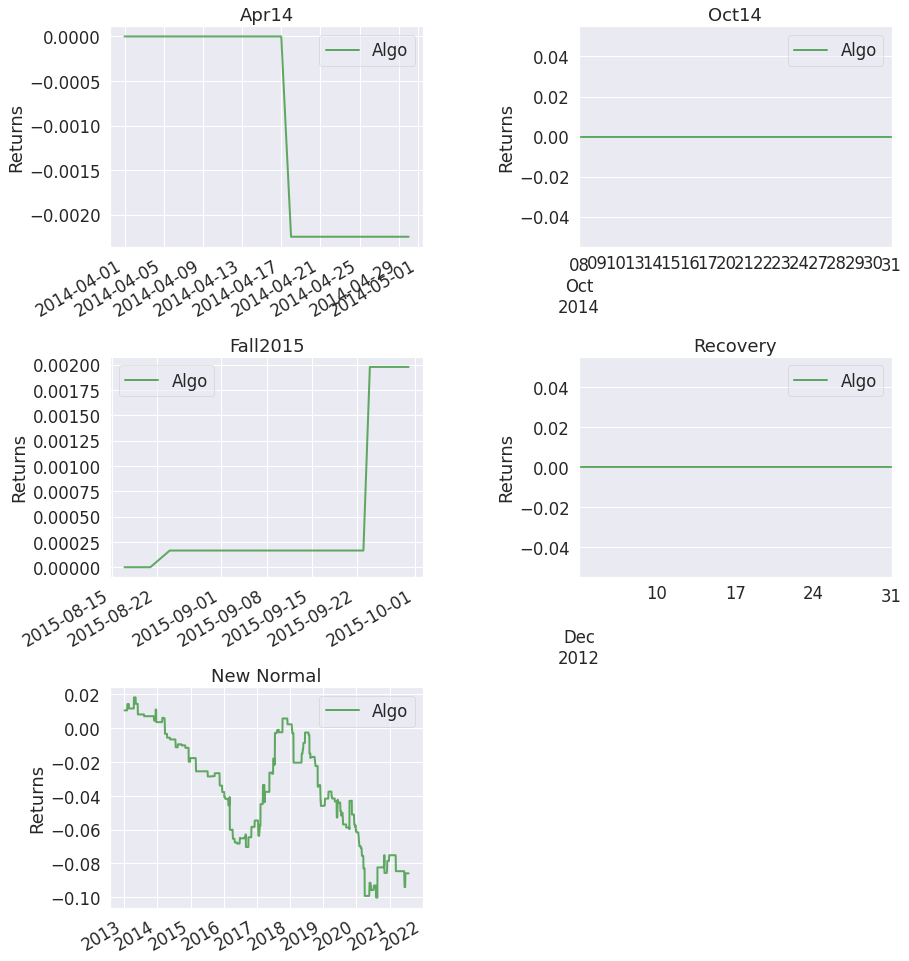

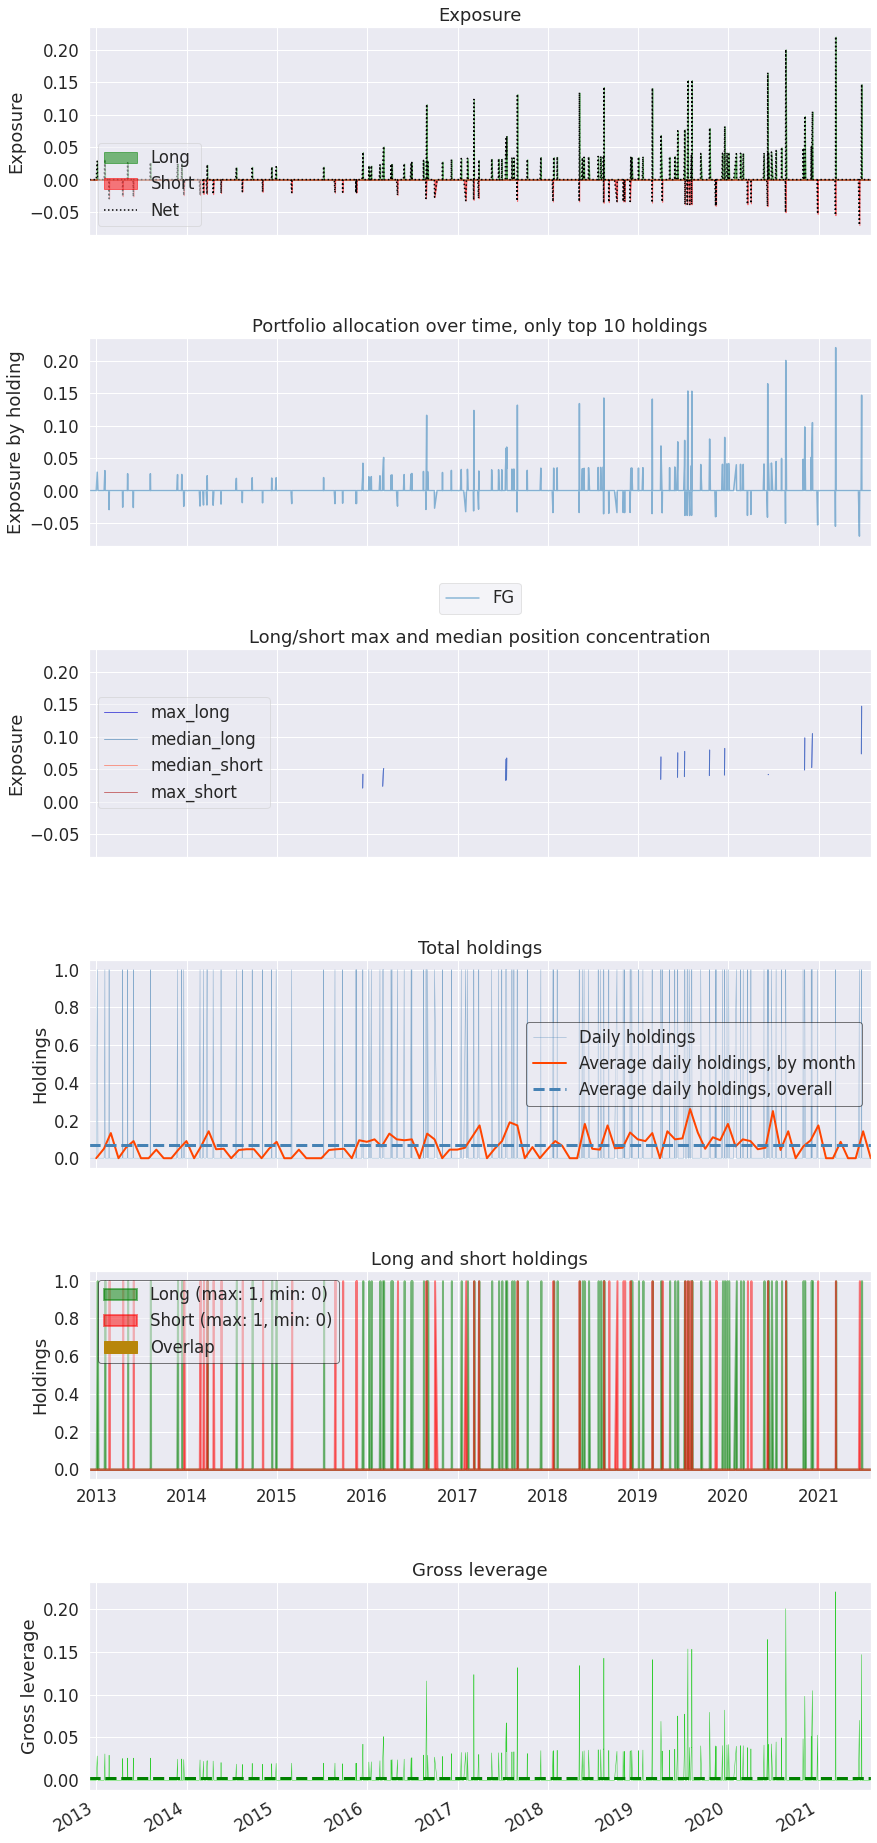

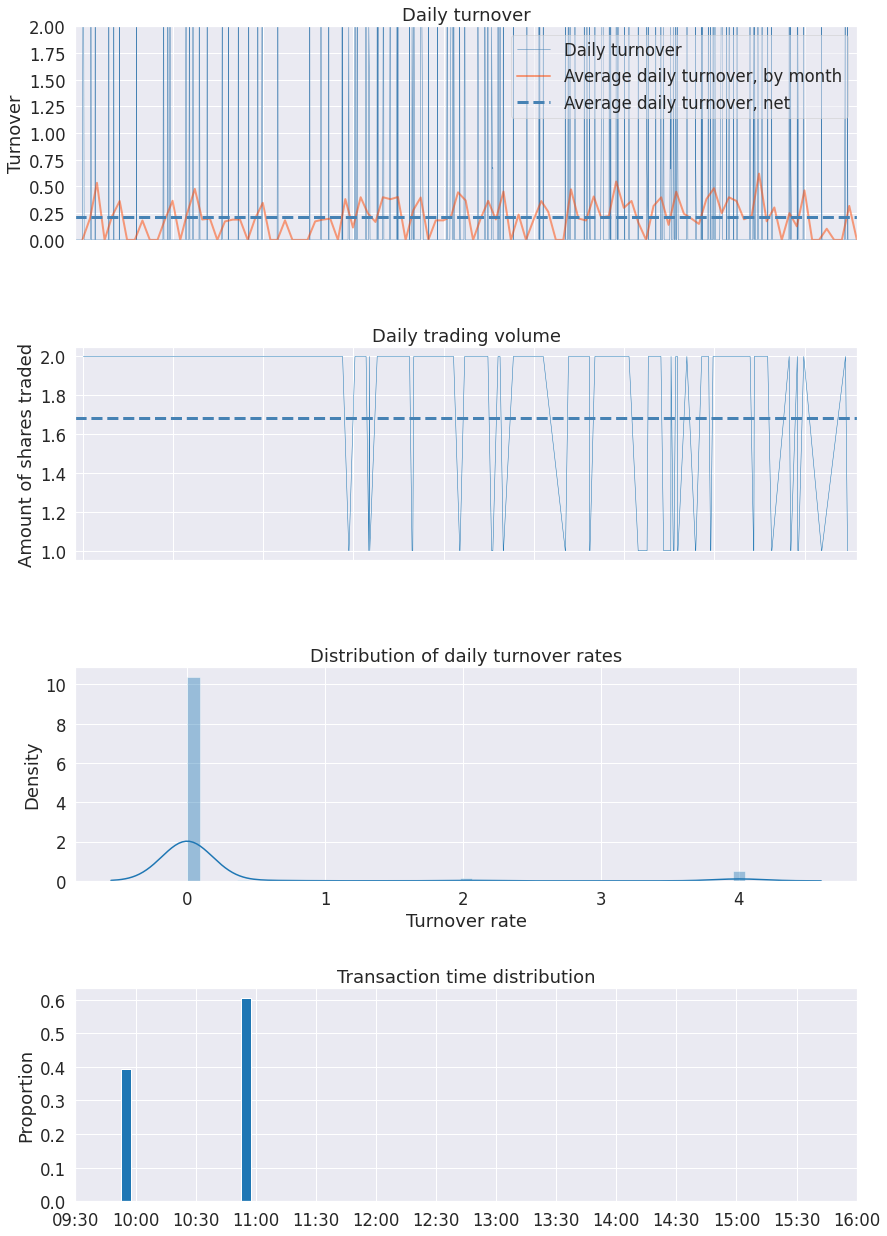

In [1]:
import time,datetime
import os,sys
import pickle 
import numpy as np
import pandas as pd
import random
import statsmodels.api as sm
from sklearn import linear_model

import backtesting as bt
from backtesting.comminfo import ComminfoFuturesPercent,ComminfoFuturesFixed # 期货交易的手续费用，按照比例或者按照金额


import pyfolio as pf

# 编写一个新的macd的指标，使得和国内的常用macd指标接轨

        

### 编写相应的策略,每个策略逻辑需要单独编写，回测和实盘直接运行策略类就行

class KeltnerStrategy(bt.Strategy):
    # 策略作者
    author = 'yunjinqi'
    # 策略的参数
    params = (  ("look_back_days",10),                  
                ("k1",0.5), 
                ("k2",0.5),
            )
    # log相应的信息
    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or bt.num2date(self.datas[0].datetime[0])
        print('{}, {}'.format(dt.isoformat(), txt))

    # 初始化策略的data_folder
    def __init__(self):
        # 基本上常用的部分属性变量
        self.bar_num = 0       # next运行了多少个bar
        self.pre_date = None   # 保存上个交易日的日期
        # 使用未来data_folder，分析下个交易日是否存在夜盘
        self.has_night_trading = False 
        # 保存当前交易日的最高价、最低价，收盘价
        self.now_high = 0 
        self.now_low = 999999999 
        self.now_close = None
        self.now_open = None 
        # 保存历史上的每日的最高价、最低价与收盘价
        self.day_high_list = []
        self.day_low_list = []
        self.day_close_list = []
        # 保存交易状态
        self.marketposition = 0
        
        
        
    def prenext(self):
        # 由于期货data_folder有几千个，每个期货交易日期不同，并不会自然进入next
        # 需要在每个prenext中调用next函数进行运行
        # self.next() 
        pass 
        
    # 在next中添加相应的策略逻辑
    def next(self):
        # 每次运行一次，bar_num自然加1,并更新交易日
        self.current_datetime = bt.num2date(self.datas[0].datetime[0])
        self.current_hour = self.current_datetime.hour
        self.current_minute = self.current_datetime.minute
        self.bar_num+=1
        # data_folder
        data = self.datas[0]
        
        # 更新最高价、最低价、收盘价
        self.now_high = max(self.now_high,data.high[0])
        self.now_low = min(self.now_low,data.low[0])
        if self.now_close is None:
            self.now_open = data.open[0]
        self.now_close = data.close[0]
        # 如果是新的交易日的最后一分钟的data_folder
        if self.current_hour==15:
            # 保存当前的三个价格
            self.day_high_list.append(self.now_high)
            self.day_low_list.append(self.now_low)
            self.day_close_list.append(self.now_close)
            # 初始化四个价格
            self.now_high = 0 
            self.now_low = 999999999 
            self.now_close = None 
        # 长度足够，开始计算指标、交易信号
        if len(self.day_high_list)>self.p.look_back_days:
            # 计算range
            hh = max(self.day_high_list[-1*self.p.look_back_days:])
            lc = min(self.day_close_list[-1*self.p.look_back_days:])
            hc = max(self.day_close_list[-1*self.p.look_back_days:])
            ll = min(self.day_low_list[-1*self.p.look_back_days:])
            range_price = max(hh-lc,hc-ll)
            # 计算上轨与下轨
            close = data.close[0]
            upper_line = self.now_open + self.p.k1*range_price
            lower_line = self.now_open - self.p.k2*range_price
            # 其实可以把计算指标的过程写成一个函数，这样在next中只保留策略逻辑，看起来会更简洁一些。
            # 开始交易
            open_time_1 = self.current_hour>=21 and self.current_hour<=23
            open_time_2 = self.current_hour>=9 and self.current_hour<=11
            if open_time_1 or open_time_2:
                # 开多
                if self.marketposition == 0 and close>upper_line:
                    self.buy(data,size = 1)
                    self.marketposition = 1

                # 开空
                if self.marketposition == 0 and close<lower_line:
                    self.sell(data,size = 1)
                    self.marketposition = -1
                
            # 平多开空
            if self.marketposition == 1 and close<lower_line:
                # 使用target_order也可以，不同的下单方法，本质一样
                self.close(data)
                self.sell(data,size = 1)
                self.marketposition = -1
            
            # 平空开多
            if self.marketposition == -1 and close>upper_line:
                # 使用target_order也可以，不同的下单方法，本质一样
                self.close(data)
                self.buy(data,size = 1)
                self.marketposition = 1
                
            # 收盘前平仓
            if self.marketposition!=0 and self.current_hour == 14 and self.current_minute == 55 :
                self.close(data)
                self.marketposition = 0
         
                
            
            
            
        
     
   
        
                
    def notify_order(self, order):
        
        if order.status in [order.Submitted, order.Accepted]:
            return
        
        if order.status == order.Rejected:
            self.log(f"Rejected : order_ref:{order.ref}  data_name:{order.p.data._name}")
            
        if order.status == order.Margin:
            self.log(f"Margin : order_ref:{order.ref}  data_name:{order.p.data._name}")
            
        if order.status == order.Cancelled:
            self.log(f"Concelled : order_ref:{order.ref}  data_name:{order.p.data._name}")
            
        if order.status == order.Partial:
            self.log(f"Partial : order_ref:{order.ref}  data_name:{order.p.data._name}")
         
        if order.status == order.Completed:
            if order.isbuy():
                self.log(f" BUY : data_name:{order.p.data._name} price : {order.executed.price} , cost : {order.executed.value} , commission : {order.executed.comm}")

            else:  # Sell
                self.log(f" SELL : data_name:{order.p.data._name} price : {order.executed.price} , cost : {order.executed.value} , commission : {order.executed.comm}")
    
    def notify_trade(self, trade):
        # 一个trade结束的时候输出信息
        if trade.isclosed:
            self.log('closed symbol is : {} , total_profit : {} , net_profit : {}' .format(
                            trade.getdataname(),trade.pnl, trade.pnlcomm))
            
        if trade.isopen:
            self.log('open symbol is : {} , price : {} ' .format(
                            trade.getdataname(),trade.price))

            
    def stop(self):
        pass 
    
    
# 准备配置策略
cerebro = bt.Cerebro()
# 参数设置
data_kwargs = dict(
            fromdate = datetime.datetime(2012,12, 3),
            todate = datetime.datetime(2021,7,31),
            timeframe = bt.TimeFrame.Minutes,
            compression = 1,
            dtformat=('%Y-%m-%d %H:%M:%S'), # 日期和时间格式
            tmformat=('%H:%M:%S'), # 时间格式
            datetime=0,
            high=3,
            low=4,
            open=1,
            close=2,
            volume=5,
            openinterest=6)

# 玻璃后复权data_folder
data_path = "./future/FG889.csv"
# 加载该data_folder
name = "FG"
df = pd.read_csv(data_path)
# 只要data_folder里面的这几列
df = df[['datetime','open','high','low','close','volume','open_interest']]
df.columns = ['datetime','open','high','low','close','volume','openinterest']
# 修改列的名字
df.index = pd.to_datetime(df['datetime'])
# 如果对data_folder的时间顺序比较确定是从小到大的，可以不用排序，否则最好做下排序
df = df[['open','high','low','close','volume','openinterest']]
df = df[(df.index<=data_kwargs['todate'])&(df.index>=data_kwargs['fromdate'])]
feed = bt.feeds.PandasDirectData(dataname = df)
cerebro.adddata(feed, name = name)
# 设置合约的交易信息，交易1手需要6元手续费，我们额外增加1跳的交易成本做滑点(也可以通过滑点设置)
comm=ComminfoFuturesFixed(commission=26,margin=0.15, mult=20)
cerebro.broker.addcommissioninfo(comm, name= name)
cerebro.broker.setcash(50000.0)
# 添加策略
cerebro.addstrategy(KeltnerStrategy)
cerebro.addanalyzer(bt.analyzers.TotalValue, _name='_TotalValue')
cerebro.addanalyzer(bt.analyzers.PyFolio)

# 运行回测
results = cerebro.run()

pyfoliozer = results[0].analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
pf.create_full_tear_sheet(
    returns,
    positions=positions,
    transactions=transactions,
    )


优化一下

In [9]:
import time,datetime
import os,sys
import pickle 
import numpy as np
import pandas as pd
import random
import statsmodels.api as sm
from sklearn import linear_model
import threading
from queue import Queue

import backtesting as bt 
from backtesting.comminfo import ComminfoFuturesPercent,ComminfoFuturesFixed # 期货交易的手续费用，按照比例或者按照金额


import pyfolio as pf
from multiprocessing import Pool
from itertools import product

# 编写一个新的macd的指标，使得和国内的常用macd指标接轨

        

### 编写相应的策略,每个策略逻辑需要单独编写，回测和实盘直接运行策略类就行

class DualThrustStrategy(bt.Strategy):
    # 策略的参数
    params = (  ("look_back_days",10),                  
                ("k1",0.5), 
                ("k2",0.5),
            )
    # log相应的信息
    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or bt.num2date(self.datas[0].datetime[0])
        print('{}, {}'.format(dt.isoformat(), txt))

    # 初始化策略的data_folder
    def __init__(self):
        # 基本上常用的部分属性变量
        self.bar_num = 0       # next运行了多少个bar
        self.pre_date = None   # 保存上个交易日的日期
        # 使用未来data_folder，分析下个交易日是否存在夜盘
        self.has_night_trading = False 
        # 保存当前交易日的最高价、最低价，收盘价
        self.now_high = 0 
        self.now_low = 999999999 
        self.now_close = None
        self.now_open = None 
        # 保存历史上的每日的最高价、最低价与收盘价
        self.day_high_list = []
        self.day_low_list = []
        self.day_close_list = []
        # 保存交易状态
        self.marketposition = 0
        
        
        
    def prenext(self):
        # 由于期货data_folder有几千个，每个期货交易日期不同，并不会自然进入next
        # 需要在每个prenext中调用next函数进行运行
        # self.next() 
        pass 
        
    # 在next中添加相应的策略逻辑
    def next(self):
        # 每次运行一次，bar_num自然加1,并更新交易日
        self.current_datetime = bt.num2date(self.datas[0].datetime[0])
        self.current_hour = self.current_datetime.hour
        self.current_minute = self.current_datetime.minute
        self.bar_num+=1
        # data_folder
        data = self.datas[0]
        
        # 更新最高价、最低价、收盘价
        self.now_high = max(self.now_high,data.high[0])
        self.now_low = min(self.now_low,data.low[0])
        if self.now_close is None:
            self.now_open = data.open[0]
        self.now_close = data.close[0]
        # 如果是新的交易日的最后一分钟的data_folder
        if self.current_hour==15:
            # 保存当前的三个价格
            self.day_high_list.append(self.now_high)
            self.day_low_list.append(self.now_low)
            self.day_close_list.append(self.now_close)
            # 初始化四个价格
            self.now_high = 0 
            self.now_low = 999999999 
            self.now_close = None 
        # 长度足够，开始计算指标、交易信号
        if len(self.day_high_list)>self.p.look_back_days:
            # 计算range
            hh = max(self.day_high_list[-1*self.p.look_back_days:])
            lc = min(self.day_close_list[-1*self.p.look_back_days:])
            hc = max(self.day_close_list[-1*self.p.look_back_days:])
            ll = min(self.day_low_list[-1*self.p.look_back_days:])
            range_price = max(hh-lc,hc-ll)
            # 计算上轨与下轨
            close = data.close[0]
            upper_line = self.now_open + self.p.k1*range_price
            lower_line = self.now_open - self.p.k2*range_price
            # self.log(f"close: {close},upper_line:{upper_line},lower_line:{lower_line}，range:{range_price},hh:{hh},lc:{lc},hc:{hc},ll:{ll}")
            # 其实可以把计算指标的过程写成一个函数，这样在next中只保留策略逻辑，看起来会更简洁一些。
            # 开始交易
            open_time_1 = self.current_hour>=21 and self.current_hour<=23
            open_time_2 = self.current_hour>=9 and self.current_hour<=11
            if open_time_1 or open_time_2:
                # 开多
                if self.marketposition == 0 and close>upper_line:
                    self.buy(data,size = 1)
                    self.marketposition = 1

                # 开空
                if self.marketposition == 0 and close<lower_line:
                    self.sell(data,size = 1)
                    self.marketposition = -1
                
            # 平多开空
            if self.marketposition == 1 and close<lower_line:
                # 使用target_order也可以，不同的下单方法，本质一样
                self.close(data)
                self.sell(data,size = 1)
                self.marketposition = -1
            
            # 平空开多
            if self.marketposition == -1 and close>upper_line:
                # 使用target_order也可以，不同的下单方法，本质一样
                self.close(data)
                self.buy(data,size = 1)
                self.marketposition = 1
                
            # 收盘前平仓
            if self.marketposition!=0 and self.current_hour == 14 and self.current_minute == 55 :
                self.close(data)
                self.marketposition = 0
            
    def stop(self):
        pass 
    
def run(params):
    print(f"开始运行{params}")  
    # 准备配置策略
    cerebro = bt.Cerebro()
    # 参数设置
    data_kwargs = dict(
                fromdate = datetime.datetime(2012,12, 3),
                todate = datetime.datetime(2021,7,31),
                timeframe = bt.TimeFrame.Minutes,
                compression = 1,
                dtformat=('%Y-%m-%d %H:%M:%S'), # 日期和时间格式
                tmformat=('%H:%M:%S'), # 时间格式
                datetime=0,
                high=3,
                low=4,
                open=1,
                close=2,
                volume=5,
                openinterest=6)

    # 玻璃后复权data_folder
    data_path = "./future/FG889.csv"
    # 加载该data_folder
    name = "FG"
    df = pd.read_csv(data_path)
    # 只要data_folder里面的这几列
    df = df[['datetime','open','high','low','close','volume','open_interest']]
    df.columns = ['datetime','open','high','low','close','volume','openinterest']
    # 修改列的名字
    df.index = pd.to_datetime(df['datetime'])
    # 如果对data_folder的时间顺序比较确定是从小到大的，可以不用排序，否则最好做下排序
    df = df[['open','high','low','close','volume','openinterest']]
    df = df[(df.index<=data_kwargs['todate'])&(df.index>=data_kwargs['fromdate'])]
    feed = bt.feeds.PandasDirectData(dataname = df)
    cerebro.adddata(feed, name = name)
    # 设置合约的交易信息，交易1手需要6元手续费，我们额外增加1跳的交易成本做滑点(也可以通过滑点设置)
    comm=ComminfoFuturesFixed(commission=26,margin=0.15, mult=20)
    cerebro.broker.addcommissioninfo(comm, name= name)
    cerebro.broker.setcash(50000.0)
    # 添加策略
    cerebro.addstrategy(DualThrustStrategy)
    kwags={"look_back_days":params[0],                  
            "k1":params[1],
            "k2":params[2] }
    # 添加策略
    cerebro.addstrategy(DualThrustStrategy,**kwags)
    cerebro.addanalyzer(bt.analyzers.TotalValue, _name='my_value')
    cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='my_sharpe')
    cerebro.addanalyzer(bt.analyzers.Returns, _name='my_returns')
    cerebro.addanalyzer(bt.analyzers.DrawDown, _name='my_drawdown')
    cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name='my_trade_analyzer')


    # 运行回测
    results = cerebro.run()
    sharpe_ratio = results[0].analyzers.my_sharpe.get_analysis()['sharperatio']
    annual_return = results[0].analyzers.my_returns.get_analysis()['rnorm']
    max_drawdown = results[0].analyzers.my_drawdown.get_analysis()["max"]["drawdown"]/100
    trade_num = results[0].analyzers.my_trade_analyzer.get_analysis()['total']['total']
    value_df = pd.DataFrame([results[0].analyzers.my_value.get_analysis()]).T
    value_df.columns=['value']
    # print(value_df.head())
    file_name = str(params[0])+"__"+str(params[1])+"__"+str(params[2])+"__"+str(round(sharpe_ratio,2))+"__"+str(round(annual_return,2))+"__"+str(round(max_drawdown,2))+"__"+str(trade_num)
    value_df.to_csv("./玻璃-DualThrust参数优化结果/"+file_name+".csv")
    return [params[0],params[1],params[2],sharpe_ratio,annual_return,max_drawdown,trade_num]


period_list = range(10,100,10)
k1_list = [i/10 for i in range(1,11)]
k2_list = [i/10 for i in range(1,11)]
params_list = product(period_list,k1_list,k2_list)


def worker(params, results_queue):
    result = run(params)
    results_queue.put(result)

results = []
results_queue = Queue()

# 创建并启动线程
threads = []
for params in params_list:
    thread = threading.Thread(target=worker, args=(params, results_queue))
    thread.start()
    threads.append(thread)

# 等待所有线程执行完毕
for thread in threads:
    thread.join()

# 从队列中获取结果
while not results_queue.empty():
    result = results_queue.get()
    results.append(result)

# results = []
# for params in params_list:
#     result = run(params)
#     results.append(result)
# with Pool(3) as p:
#     results = p.map(run,params_list)
df = pd.DataFrame(results,columns=['look_back_days','k1',"k2","sharpe_ratio","annual_return","max_drawdown","trade_num"])
df.to_csv("./鸡蛋-肯特纳策略参数优化结果.csv")

开始运行(10, 0.1, 0.1)开始运行(10, 0.1, 0.2)

开始运行(10, 0.1, 0.3)
开始运行(10, 0.1, 0.4)开始运行(10, 0.1, 0.5)开始运行(10, 0.1, 0.6)


开始运行(10, 0.1, 0.7)
开始运行(10, 0.1, 0.8)
开始运行(10, 0.1, 0.9)
开始运行(10, 0.1, 1.0)
开始运行(10, 0.2, 0.1)
开始运行(10, 0.2, 0.2)
开始运行(10, 0.2, 0.3)
开始运行(10, 0.2, 0.4)
开始运行(10, 0.2, 0.5)
开始运行(10, 0.2, 0.6)
开始运行(10, 0.2, 0.7)
开始运行(10, 0.2, 0.8)
开始运行(10, 0.2, 0.9)
开始运行(10, 0.2, 1.0)
开始运行(10, 0.3, 0.1)
开始运行(10, 0.3, 0.2)
开始运行(10, 0.3, 0.3)
开始运行(10, 0.3, 0.4)
开始运行(10, 0.3, 0.5)
开始运行(10, 0.3, 0.6)
开始运行(10, 0.3, 0.7)开始运行(10, 0.3, 0.8)
开始运行(10, 0.3, 0.9)

开始运行(10, 0.3, 1.0)开始运行(10, 0.4, 0.1)

开始运行(10, 0.4, 0.2)
开始运行(10, 0.4, 0.3)
开始运行(10, 0.4, 0.4)
开始运行(10, 0.4, 0.5)
开始运行(10, 0.4, 0.6)
开始运行(10, 0.4, 0.7)
开始运行(10, 0.4, 0.8)
开始运行(10, 0.4, 0.9)
开始运行(10, 0.4, 1.0)
开始运行(10, 0.5, 0.1)
开始运行(10, 0.5, 0.2)
开始运行(10, 0.5, 0.3)开始运行(10, 0.5, 0.4)

开始运行(10, 0.5, 0.5)开始运行(10, 0.5, 0.6)

开始运行(10, 0.5, 0.7)
开始运行(10, 0.5, 0.8)
开始运行(10, 0.5, 0.9)开始运行(10, 0.5, 1.0)开始运行(10, 0.6, 0.1)

开始运行(10, 0.6, 0.2)

开始运行(10, 0.6

In [2]:
import os
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py 
import dash
from dash import dcc                  # 交互式组件
from dash import html                 # 代码转html
from dash.dependencies import Input, Output         # 回调
import dash_bootstrap_components as dbc 

### data_folder预处理，读取相关的data_folder
datas = {}
result = []
file_list = os.listdir("./玻璃-DualThrust参数优化结果/参数优化结果/")
for file in file_list:
    print(file)
    df = pd.read_csv("./玻璃-DualThrust参数优化结果/参数优化结果/"+file,index_col=0)
    df['datetime']=pd.to_datetime(df.index)
    param = file[:-4] 
    look_back_days,k1,k2,sharpe_ratio,annual_return,max_drawdown,trade_num = param.split("__")
    datas[look_back_days+"_"+k1+"_"+k2] = df
    result.append([look_back_days,k1,k2,sharpe_ratio,annual_return,max_drawdown,trade_num])
data = pd.DataFrame(result,columns=['look_back_days','k1','k2','sharpe_ratio','annual_return','max_drawdown','trade_num'])
data = data.astype("float")
### 运行dash
app = dash.Dash('玻璃-DualThrust参数优化结果')

app.layout =  html.Div([

    html.Div([
            dcc.Dropdown(
                id = 'indicator_value',
                options = [{'label': i, 'value': i} for i in sorted([float(i) for i in data['look_back_days'].unique()])],
                value = 50),
            dcc.Graph(id = 'crossfilter-indicator-heatmap',
            hoverData = dict(points = [{'customdata': ('60','1.0','1.0')}]))
                ],
            style = dict(width = '49%', display = 'inline-block')),

    # 设置交互data_folder对象及默认值
    html.Div([
        # 设置交互的子图表
        dcc.Graph(id = 'value-time-series')],
        style = dict(width = '49%', display = 'inline-block')),  
])


# 回调1个指标值
@app.callback(
    Output('crossfilter-indicator-heatmap', 'figure'),
    [ Input('indicator_value', 'value'),
     ])
def update_figure(indicator_value):
    df = data[data['look_back_days']==float(indicator_value)]
    print(df.tail())
    df['text']="look_back_days"+" : "+df['look_back_days'].astype("str")+"<br>"+\
            "k1"+" : "+df['k1'].astype("str")+"<br>"+\
            "k2"+" : "+df['k2'].astype("str")+"<br>"+\
            "sharpe_ratio"+" : "+df['sharpe_ratio'].astype("str")+"<br>"+\
            "annual_return"+" : "+df['annual_return'].astype("str")+"<br>"+\
            "max_drawdown"+" : "+df['max_drawdown'].astype("str")+"<br>"+\
            "trade_num"+" : "+df['trade_num'].astype("str")+"<br>"
    # print(df.head())
    layout = go.Layout(
            # plot_bgcolor='red',  # 图背景颜色
            paper_bgcolor='white',  # 图像背景颜色
            autosize=True,
            width=600,
            height=600,
            title='策略-热力图',
            titlefont=dict(size=30, color='gray'),

            # 图例相对于左下角的位置
            legend=dict(
                x=0.02,
                y=0.02
            ),

            # x轴的刻度和标签
            xaxis=dict(title='k1',  # 设置坐标轴的标签
                    titlefont=dict(color='red', size=20),
                    tickfont=dict(color='blue', size=18, ),
                    tickangle=45,  # 刻度旋转的角度
                    showticklabels=True,  # 是否显示坐标轴
                    ),

            # y轴的刻度和标签
            yaxis=dict(title='k2',  # 坐标轴的标签
                    titlefont=dict(color='blue', size=18),  # 坐标轴标签的字体及颜色
                    tickfont=dict(color='green', size=20, ),  # 刻度的字体大小及颜色
                    showticklabels=True,  # 设置是否显示刻度
                    tickangle=-45,
                    # 设置刻度的范围及刻度
                    autorange=True,
                    # range=[0, 100],
                    # type='linear',
                    ),
        )
    fig = go.Figure(data=go.Heatmap(
            showlegend=True,
            name='data_folder',
            x=df["k1"],
            y=df['k2'],
            z=df['sharpe_ratio'],
            type='heatmap',
            text = df['text'],
            customdata = df[["look_back_days","k1",'k2']],
            hoverinfo = "text",
            hovertext = df['text']),
        layout=layout
    )
 
    fig.update_layout(margin=dict(t=100, r=150, b=100, l=100), autosize=True),
    
    return fig 
    

# # 回调--设置上子图表的交互
@app.callback(
    Output('value-time-series', 'figure'),
    [Input('crossfilter-indicator-heatmap', 'hoverData'),
     ])
def update_figure(hoverData):
    look_back_days,k1,k2 = hoverData['points'][0]['customdata']
    key = str(look_back_days)+"_"+str(k1)+"_"+str(k2)
    # print(datas.keys())
    data = datas[key]
    data.index = pd.to_datetime(data.index)
    layout = go.Layout(
            # plot_bgcolor='red',  # 图背景颜色
            paper_bgcolor='white',  # 图像背景颜色
            autosize=True,
            width=800,
            height=600,)
    fig = go.Figure(data=go.Scatter(
            showlegend=True,
            name=f"{look_back_days}__{k1}__{k2}的资产曲线",
            x=data.index,
            y=data['value'],
            
        ),layout = layout)
    
    return fig 

app.run_server()

90__0.2__0.2__-0.05__-0.09__0.85__21.csv
80__1.6__1.6__-0.7__-0.01__0.12__123.csv
50__0.6__1.4__-0.67__-0.01__0.16__43.csv
80__1.6__2.0__-0.7__-0.01__0.12__123.csv
10__1.6__0.2__-1.01__-0.18__0.82__4.csv
30__1.6__0.2__-0.48__-0.05__0.63__9.csv
30__0.4__1.4__-0.57__-0.07__0.52__16.csv
80__0.2__0.6__-0.76__-0.06__0.52__17.csv
40__1.0__1.4__-0.7__-0.01__0.12__123.csv
10__0.6__1.2__-1.06__-0.24__0.9__6.csv
40__1.4__0.6__-0.67__-0.02__0.16__105.csv
60__0.8__0.8__-0.7__-0.01__0.12__123.csv
30__1.0__0.2__-0.47__-0.05__0.63__11.csv
90__0.8__1.2__-0.7__-0.01__0.12__123.csv
40__1.6__1.8__-0.7__-0.01__0.12__123.csv
30__0.6__1.4__-0.66__-0.01__0.16__32.csv
80__1.0__0.2__0.12__0.02__0.43__58.csv
70__1.2__1.8__-0.7__-0.01__0.12__123.csv
90__2.0__0.4__-0.7__-0.01__0.12__123.csv
30__2.0__1.4__-0.7__-0.01__0.12__123.csv
50__1.8__1.8__-0.7__-0.01__0.12__123.csv
80__0.6__1.2__-0.7__-0.01__0.12__123.csv
10__1.8__0.6__-0.13__0.0__0.31__16.csv
90__1.8__2.0__-0.7__-0.01__0.12__123.csv
70__0.4__1.6__-0.71__-0

     look_back_days   k1   k2  sharpe_ratio  annual_return  max_drawdown  \
860            50.0  1.6  1.8         -0.70          -0.01          0.12   
867            50.0  0.8  0.4         -0.67          -0.02          0.17   
869            50.0  1.0  1.4         -0.70          -0.01          0.12   
874            50.0  2.0  1.8         -0.70          -0.01          0.12   
898            50.0  0.6  0.6         -0.67          -0.01          0.16   

     trade_num  
860      123.0  
867      122.0  
869      123.0  
874      123.0  
898       43.0  


/var/folders/n5/hxfz5jwj03jdcljkq0n8ftmc0000gn/T/ipykernel_31903/2034733291.py:56: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

[2023-12-15 20:38:28,662] ERROR in app: Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flask/app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flask/app.py", line 1822, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flask/app.py", line 1820, in full_dispatch_request
    rv = self.dispatch_requ

空中花园策略

策略逻辑

开多：如果当日开盘价比前一日的收盘价高一定的比例，并且当前的价格大于了当日开盘前5分钟形成的最高价，开多；

开空：如果当日的开盘价比前一日的收盘价小一定的比例，并且当前的价格小于了当日开盘前5分钟形成的最低价，开空；

平仓：收盘前5分钟平仓。

策略绩效

日内交易策略一般普适性没有那么高，很难在很多品种上都同时盈利。另外特别说明的是，在做多个品种的回测的时候，统一设置的品种的乘数、保证金、以及交易费用，这种设置是不合理的，需要针对每个品种单独设置，尤其是乘数、交易费用。

In [ ]:
import os,sys 
import numpy as np
import pandas as pd

import backtesting as bt  # backtrader
from backtesting.comminfo import ComminfoFuturesPercent,ComminfoFuturesFixed # 期货交易的手续费用，按照比例或者按照金额

import pyfolio as pf
from multiprocessing import Pool
from itertools import product


### 编写相应的策略,每个策略逻辑需要单独编写，回测和实盘直接运行策略类就行

class RBreakStrategy(bt.Strategy):
    # 策略的参数
    params = (  ("k1",0.5), 
            ("k2",0.5),                     
            )
    # log相应的信息
    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or bt.num2date(self.datas[0].datetime[0])
        print('{}, {}'.format(dt.isoformat(), txt))

    # 初始化策略的data_folder
    def __init__(self):
        # 基本上常用的部分属性变量
        self.day_bar_num = 0       # 当天的第几根bar
        self.pre_date = None   # 保存上个交易日的日期
        # 使用未来data_folder，分析下个交易日是否存在夜盘
        self.has_night_trading = False 
        # 保存当前交易日的最高价、最低价，收盘价
        self.now_high = 0 
        self.now_low = 999999999 
        self.now_close = None
        self.now_open = None 
        # 保存历史上的每日的最高价、最低价与收盘价
        self.day_high_list = []
        self.day_low_list = []
        self.day_close_list = []
        # 保存交易状态
        self.marketposition = 0
       
    def prenext(self):
        # 由于期货data_folder有几千个，每个期货交易日期不同，并不会自然进入next
        # 需要在每个prenext中调用next函数进行运行
        # self.next() 
        pass 
        
    # 在next中添加相应的策略逻辑
    def next(self):
        # 每次运行一次，bar_num自然加1,并更新交易日
        self.current_datetime = bt.num2date(self.datas[0].datetime[0])
        self.current_hour = self.current_datetime.hour
        self.current_minute = self.current_datetime.minute
        self.day_bar_num+=1
        # data_folder
        data = self.datas[0]
        
        # 更新最高价、最低价、收盘价
        self.now_high = max(self.now_high,data.high[0])
        self.now_low = min(self.now_low,data.low[0])
        if self.now_close is None:
            self.now_open = data.open[0]
        self.now_close = data.close[0]
        # 如果是新的交易日的最后一分钟的data_folder
        if self.current_hour==15:
            # 保存当前的三个价格
            self.day_high_list.append(self.now_high)
            self.day_low_list.append(self.now_low)
            self.day_close_list.append(self.now_close)
            # 初始化四个价格
            self.now_high = 0 
            self.now_low = 999999999 
            self.now_close = None
            # 初始化k线数
            self.day_bar_num = 0 
        # 长度足够，开始计算指标、交易信号
        if len(self.day_high_list)>1:
            # 计算range
            pre_high = self.day_high_list[-1]
            pre_low = self.day_low_list[-1]
            pre_close = self.day_close_list[-1]
            # 计算空中花园的开仓条件
            # 如果现在是开盘的第一根K线
            if self.day_bar_num==0:
                self.first_bar_high_price = data.high[0]
                self.first_bar_low_price = data.low[0]
            
            # 开始交易
            open_time_1 = self.current_hour>=21 and self.current_hour<=23
            open_time_2 = self.current_hour>=9 and self.current_hour<=11
            close = data.close[0]
            if open_time_1 or open_time_2:
                # 开多
                if self.marketposition == 0 and self.now_open > pre_close*(self.p.k1/1000+1) and data.close[0]>self.first_bar_high_price:
                    self.buy(data,size = 1)
                    self.marketposition = 1

                # 开空
                if self.marketposition == 0 and self.now_open < pre_close*(-1*self.p.k2/1000+1) and data.close[0]<self.first_bar_low_price:
                    self.sell(data,size = 1)
                    self.marketposition = -1     
        # 收盘前平仓
        # self.log(f"{self.current_hour},{self.current_minute}")
        if self.marketposition!=0 and self.current_hour == 14 and self.current_minute == 55 :
            self.close(data)
            self.marketposition = 0


    def stop(self):
     
        pass 
    
def run(params):
    print(f"开始运行{params}")  
    # 准备配置策略
    cerebro = bt.Cerebro()
    # 参数设置
    data_kwargs = dict(
                timeframe = bt.TimeFrame.Minutes,
                compression = 1,
                dtformat=('%Y-%m-%d %H:%M:%S'), # 日期和时间格式
                tmformat=('%H:%M:%S'), # 时间格式
                datetime=0,
                high=3,
                low=4,
                open=1,
                close=2,
                volume=5,
                openinterest=6)

    
    # 分解参数
    name ,k1,k2 = params
    # 获取当前的已经优化的文件名
    file_list = list(os.listdir("./参数优化结果/"))
    param_list=["__".join(i.split("__")[:3]) for i in file_list]
    if "__".join([str(i) for i in params]) in param_list:
        print("__".join([str(i) for i in params]),"has run")
        return [name,k1,k2,0,0,0,0]
    else:
    
        # 后复权data_folder
        data_path = ".future/jd/"+name+"889.csv"
        
        df = pd.read_csv(data_path)
        # 只要data_folder里面的这几列
        df = df[['datetime','open','high','low','close','volume','open_interest']]
        df.columns = ['datetime','open','high','low','close','volume','openinterest']
        # 修改列的名字
        df = df.sort_values("datetime")
        df = df.drop_duplicates("datetime")
        df.index = pd.to_datetime(df['datetime'])
        # 如果对data_folder的时间顺序比较确定是从小到大的，可以不用排序，否则最好做下排序
        df = df[['open','high','low','close','volume','openinterest']]
        feed = bt.feeds.PandasDirectData(dataname = df)
        cerebro.adddata(feed, name = name)
        # 设置合约的交易信息
        comm = ComminfoFuturesPercent(commission=0.0003,margin=0.10, mult=10)
        cerebro.broker.addcommissioninfo(comm, name= name)
        cerebro.broker.setcash(50000.0)
        # 添加策略
        kwags={"k1":k1,                  
                "k2":k2,
                }
        # 添加策略
        cerebro.addstrategy(RBreakStrategy,**kwags)
        cerebro.addanalyzer(bt.analyzers.TotalValue, _name='my_value')
        cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='my_sharpe')
        cerebro.addanalyzer(bt.analyzers.Returns, _name='my_returns')
        cerebro.addanalyzer(bt.analyzers.DrawDown, _name='my_drawdown')
        cerebro.addanalyzer(bt.analyzers.TradeAnalyzer, _name='my_trade_analyzer')

        # 运行回测
        results = cerebro.run()
        sharpe_ratio = results[0].analyzers.my_sharpe.get_analysis()['sharperatio']
        annual_return = results[0].analyzers.my_returns.get_analysis()['rnorm']
        max_drawdown = results[0].analyzers.my_drawdown.get_analysis()["max"]["drawdown"]/100
        trade_num = results[0].analyzers.my_trade_analyzer.get_analysis()['total']['total']
        value_df = pd.DataFrame([results[0].analyzers.my_value.get_analysis()]).T
        value_df.columns=['value']
        value_df['datetime']=pd.to_datetime(value_df.index)
        value_df['date']=[i.date() for i in value_df['datetime']]
        value_df= value_df.drop_duplicates("date",keep="last")
        value_df = value_df[['value']]
        # print(value_df.head())
        try:
            file_name = name+"__"+str(k1)+"__"+str(k2)+"__"+str(round(sharpe_ratio,2))+"__"+str(round(annual_return,2))+"__"+str(round(max_drawdown,2))+"__"+str(trade_num)
        except:
            file_name = name+"__"+str(k1)+"__"+str(k2)+"__"+str(0)+"__"+str(0)+"__"+str(0)+"__"+str(0)
        value_df.to_csv("./参数优化结果/"+file_name+".csv")
        return [name,k1,k2,sharpe_ratio,annual_return,max_drawdown,trade_num]

if __name__=="__main__":
    symbol_list = ['A', 'JD', 'J', 'JM', 'MA', 'Y', 'IF', 'BU', 'SF', 'CU', 'RB', 'HC', 'OI', 'ZC', 'P', 'RU', 'RM', 'C', 'IC', 'SR', 'T', 'AU', 'M', 
                'FG', 'CY', 'SM', 'SS', 'AP', 'CF', 'AG', 'L', 'TS', 'NI', 'ZN', 'EG', 'B', 'PB', 'V', 'TA', 'FU', 'CS', 'SP', 'PP', 'TF', 'SC', 'AL']
    k1_list = [i for i in range(5,30,3)]
    k2_list = [i for i in range(5,30,3)]
    params_list = product(symbol_list,k1_list,k2_list)
    with Pool(4) as p:
        results = p.map(run,params_list)
    df = pd.DataFrame(results,columns=["name",'k1',"k2","sharpe_ratio","annual_return","max_drawdown","trade_num"])
    df.to_csv("./all_参数优化结果.csv")
    # run([5,5])


In [3]:
import os
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py 
import dash
from dash import dcc                  # 交互式组件
from dash import html                 # 代码转html
from dash.dependencies import Input, Output         # 回调
import dash_bootstrap_components as dbc 

### data_folder预处理，读取相关的data_folder
datas = {}
result = []
symbol_list = []
file_list = os.listdir("./空中花园参数优化结果/参数优化结果/")
for file in file_list:
    print(file)
    df = pd.read_csv("./空中花园参数优化结果/参数优化结果/"+file,index_col=0)
    df['datetime']=pd.to_datetime(df.index)
    # df['date']=[i.date() for i in df['datetime']]
    # df= df.drop_duplicates("date",keep="last")
    # print(df.tail())
    param = file[:-4] 
    symbol,k1,k2,sharpe_ratio,annual_return,max_drawdown,trade_num = param.split("__")
    datas[symbol+"_"+k1+"_"+k2] = df
    result.append([k1,k2,sharpe_ratio,annual_return,max_drawdown,trade_num])
    symbol_list.append(symbol)

data = pd.DataFrame(result,columns=['k1','k2','sharpe_ratio','annual_return','max_drawdown','trade_num'])
data = data.astype("float")
data['symbol'] = symbol_list 
symbol_names = sorted(list(data['symbol'].unique()))
### 运行dash
app = dash.Dash('参数优化结果')

app.layout =   dbc.Container([
    
    dbc.Row(dbc.Col('品种名称'),
                style={
                    'background-color': 'lightgreen'
                }),
    dbc.Row(dcc.Dropdown(
                id = 'symbol_value',
                options = [{'label': i, 'value': i} for i in symbol_names],
                value = "AL")),
    dbc.Row(
            [
                dbc.Col(html.Div([
                            dcc.Graph(id = 'crossfilter-indicator-heatmap',
                            hoverData = dict(points = [{'customdata': ("AL",'11','11')}]))
                                ]),width="45%",style = dict(width = '45%', display = 'inline-block')),
                dbc.Col(html.Div([
                            # 设置交互的子图表
                            dcc.Graph(id = 'value-time-series')],
                            ),width="45%",style = dict(width = '45%', display = 'inline-block'))
                                ]
            ),
    
            
    # 设置交互data_folder对象及默认值
     
])


# 回调1个指标值
@app.callback(
    Output('crossfilter-indicator-heatmap', 'figure'),
    [ Input('symbol_value', 'value'),
     ])
def update_figure(symbol_value):
    df = data[data['symbol']==symbol_value]
    df['text']="symbol"+" : "+df['symbol'].astype("str")+"<br>"+\
            "k1"+" : "+df['k1'].astype("str")+"<br>"+\
            "k2"+" : "+df['k2'].astype("str")+"<br>"+\
            "sharpe_ratio"+" : "+df['sharpe_ratio'].astype("str")+"<br>"+\
            "annual_return"+" : "+df['annual_return'].astype("str")+"<br>"+\
            "max_drawdown"+" : "+df['max_drawdown'].astype("str")+"<br>"+\
            "trade_num"+" : "+df['trade_num'].astype("str")+"<br>"
    print(df.head())
    layout = go.Layout(
            # plot_bgcolor='red',  # 图背景颜色
            paper_bgcolor='white',  # 图像背景颜色
            autosize=True,
            width=600,
            height=600,
            title='策略-热力图',
            titlefont=dict(size=30, color='gray'),

            # 图例相对于左下角的位置
            legend=dict(
                x=0.02,
                y=0.02
            ),

            # x轴的刻度和标签
            xaxis=dict(title='k1',  # 设置坐标轴的标签
                    titlefont=dict(color='red', size=20),
                    tickfont=dict(color='blue', size=18, ),
                    tickangle=45,  # 刻度旋转的角度
                    showticklabels=True,  # 是否显示坐标轴
                    # 刻度的范围及刻度
                    # autorange=False,
                    # range=[0, 100],
                    # type='linear',
                    ),

            # y轴的刻度和标签
            yaxis=dict(title='k2',  # 坐标轴的标签
                    titlefont=dict(color='blue', size=18),  # 坐标轴标签的字体及颜色
                    tickfont=dict(color='green', size=20, ),  # 刻度的字体大小及颜色
                    showticklabels=True,  # 设置是否显示刻度
                    tickangle=-45,
                    # 设置刻度的范围及刻度
                    autorange=True,
                    # range=[0, 100],
                    # type='linear',
                    ),
        )
    fig = go.Figure(data=go.Heatmap(
            showlegend=True,
            name='data_folder',
            x=df["k1"],
            y=df['k2'],
            z=df['sharpe_ratio'],
            type='heatmap',
            text = df['text'],
            customdata = df[["symbol","k1",'k2']],
            hoverinfo = "text",
            hovertext = df['text']),
        layout=layout
    )
 
    fig.update_layout(margin=dict(t=100, r=150, b=100, l=100), autosize=True),
    
    return fig 
    
    


# # 回调--设置上子图表的交互
@app.callback(
    Output('value-time-series', 'figure'),
    [Input('crossfilter-indicator-heatmap', 'hoverData'),
     ])
def update_figure(hoverData):
    symbol,k1,k2 = hoverData['points'][0]['customdata']
    key = symbol+"_"+str(k1)+"_"+str(k2)
    # print(datas.keys())
    data = datas[key]
    print(data)
    data.index = pd.to_datetime(data.index)
    layout = go.Layout(
            # plot_bgcolor='red',  # 图背景颜色
            paper_bgcolor='white',  # 图像背景颜色
            autosize=True,
            width=800,
            height=600,)
    fig = go.Figure(data=go.Scatter(
            showlegend=True,
            name=f"{symbol}_{k1}__{k2}的资产曲线",
            x=data.index,
            y=data['value'],
            
        ),layout = layout)
    
    return fig 

app.run_server()

RB__11__17__-0.32__0.0__0.09__83.csv
ZC__5__14__-1.14__0.0__0.01__68.csv
J__5__29__0.01__0.01__0.11__447.csv
M__23__26__-1.48__0.0__0.02__19.csv
EG__5__11__-1.59__-0.05__0.17__86.csv
JD__11__5__0.21__0.02__0.18__291.csv
SM__14__23__-0.59__-0.04__0.3__34.csv
OI__14__26__-0.09__0.01__0.08__29.csv
FU__8__26__-0.19__-0.07__0.85__654.csv
L__26__8__-0.4__-0.05__0.6__234.csv
T__5__8__-146.12__0.0__0.0__16.csv
AP__11__11__-0.26__-0.04__0.33__28.csv
PP__29__23__-1.08__-0.0__0.06__5.csv
CF__14__8__-0.03__-0.04__0.75__73.csv
JD__5__26__-0.54__-0.02__0.25__245.csv
CF__8__23__-0.74__-0.13__0.82__105.csv
Y__5__29__-1.05__-0.11__0.88__552.csv
OI__26__8__-0.22__0.0__0.08__65.csv
PB__26__29__-0.7__-0.05__0.42__26.csv
SF__8__20__-1.12__-0.16__0.81__142.csv
P__23__23__-0.36__-0.01__0.22__89.csv
T__5__5__-297.01__-0.0__0.0__20.csv
B__5__17__-1.11__-0.04__0.44__138.csv
AL__8__14__-0.92__-0.14__0.86__83.csv
MA__14__8__-0.6__-0.01__0.13__86.csv
C__20__14__-1.53__-0.0__0.05__15.csv
BU__29__8__-0.22__-0.01__0.

/var/folders/n5/hxfz5jwj03jdcljkq0n8ftmc0000gn/T/ipykernel_31903/2130935117.py:72: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



       k1    k2  sharpe_ratio  annual_return  max_drawdown  trade_num symbol  \
23    8.0  14.0         -0.92          -0.14          0.86       83.0     AL   
85    5.0   5.0         -0.70          -0.17          0.90      199.0     AL   
132   8.0  23.0         -0.11          -0.09          0.88      128.0     AL   
221  11.0   5.0         -0.63          -0.15          0.86      234.0     AL   
229   5.0  17.0         -0.81          -0.15          0.87      114.0     AL   

                                                  text  
23   symbol : AL<br>k1 : 8.0<br>k2 : 14.0<br>sharpe...  
85   symbol : AL<br>k1 : 5.0<br>k2 : 5.0<br>sharpe_...  
132  symbol : AL<br>k1 : 8.0<br>k2 : 23.0<br>sharpe...  
221  symbol : AL<br>k1 : 11.0<br>k2 : 5.0<br>sharpe...  
229  symbol : AL<br>k1 : 5.0<br>k2 : 17.0<br>sharpe...  
                         value            datetime
2010-01-04 15:00:00  50000.000 2010-01-04 15:00:00
2010-01-05 15:00:00  50000.000 2010-01-05 15:00:00
2010-01-06 15:00:00  500